In [60]:
import os

import pandas as pd
pd.set_option('display.max_rows', 40)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 40)

from datetime import datetime

from sklearn import preprocessing, neighbors, grid_search, cross_validation

from sklearn import linear_model, cross_validation

from pandas.tools.plotting import scatter_matrix
from sklearn import tree, ensemble, metrics, cross_validation, externals
from sklearn.preprocessing import MinMaxScaler
from sklearn import feature_selection, linear_model

import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [61]:
df  = pd.read_csv('dataset-17-ames-housing.csv')

In [62]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,...,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,...,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,...,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,...,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,...,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,...,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,...,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,...,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,...,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,...,2.0,608.0,TA,TA,Y,237,152,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,...,2.0,442.0,TA,TA,Y,140,60,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


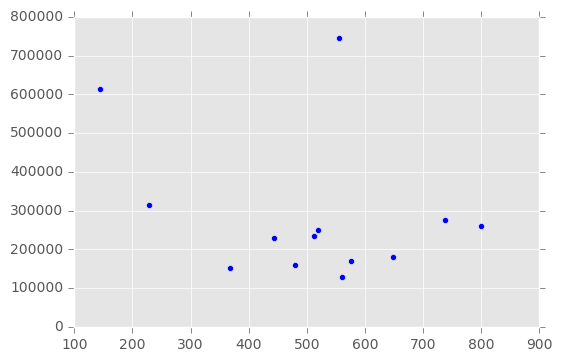

In [5]:
plt.scatter(x='Pool Area',y='SalePrice', data=df[df['Pool Area']>0])

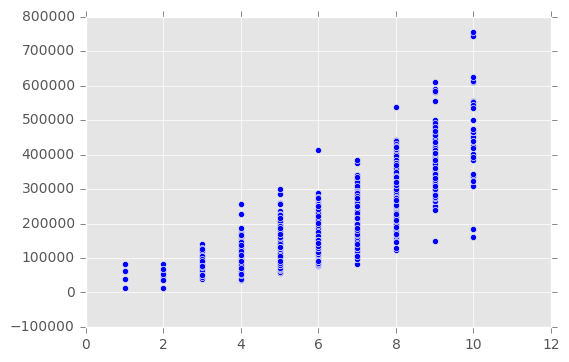

In [6]:
plt.scatter(x='Overall Qual',y='SalePrice', data=df)


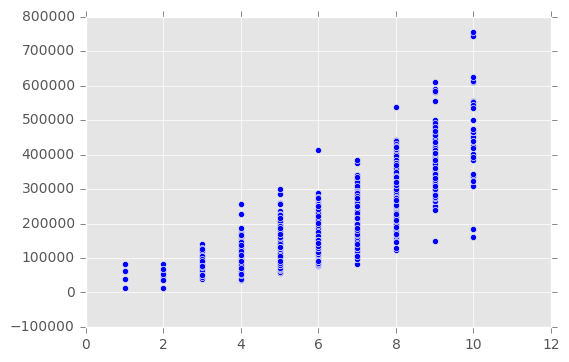

In [21]:
plt.scatter(x='Overall Qual',y='SalePrice', data=df[df['Overall Qual'].isnull() == False])

# Cleaning up Data.

In [22]:
# Dropping Alley as its mostly NULL

df.drop(['Alley'],axis=1,inplace=True) 

In [23]:
df.

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
                  ... 
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Paved Drive          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Pool QC           2917
Fence             2358
Misc Feature      2824
Misc Val             0
Mo Sold              0
Yr Sold              0
Sale Type            0
Sale Condition       0
SalePrice            0
dtype: int64

In [33]:
df.columns

Index([u'Order', u'PID', u'MS SubClass', u'MS Zoning', u'Lot Frontage',
       u'Lot Area', u'Street', u'Lot Shape', u'Land Contour', u'Utilities',
       u'Lot Config', u'Land Slope', u'Neighborhood', u'Condition 1',
       u'Condition 2', u'Bldg Type', u'House Style', u'Overall Qual',
       u'Overall Cond', u'Year Built', u'Year Remod/Add', u'Roof Style',
       u'Roof Matl', u'Exterior 1st', u'Exterior 2nd', u'Mas Vnr Type',
       u'Mas Vnr Area', u'Exter Qual', u'Exter Cond', u'Foundation',
       u'Bsmt Qual', u'Bsmt Cond', u'Bsmt Exposure', u'BsmtFin Type 1',
       u'BsmtFin SF 1', u'BsmtFin Type 2', u'BsmtFin SF 2', u'Bsmt Unf SF',
       u'Total Bsmt SF', u'Heating', u'Heating QC', u'Central Air',
       u'Electrical', u'1st Flr SF', u'2nd Flr SF', u'Low Qual Fin SF',
       u'Gr Liv Area', u'Bsmt Full Bath', u'Bsmt Half Bath', u'Full Bath',
       u'Half Bath', u'Bedroom AbvGr', u'Kitchen AbvGr', u'Kitchen Qual',
       u'TotRms AbvGrd', u'Functional', u'Fireplaces', u'Fire

In [42]:
neiprice = df[['Neighborhood','SalePrice']].groupby('Neighborhood').mean()

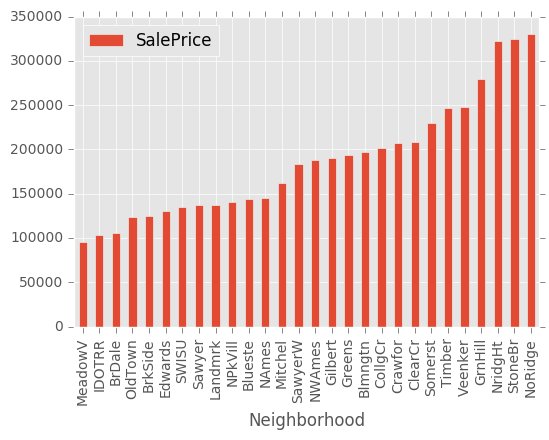

In [47]:
neiprice = df[['Neighborhood','SalePrice']].groupby('Neighborhood').mean()
neiprice = neiprice.sort_values('SalePrice')
neiprice.plot(kind = 'bar')

In [63]:
yearbuilt = df[['Neighborhood','Year Built']].groupby('Neighborhood').mean()

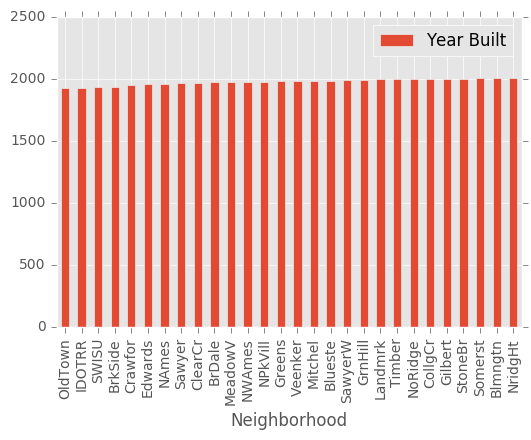

In [59]:
yearbuilt = yearbuilt.sort_values('Year Built')

yearbuilt.plot(kind = 'bar')

In [64]:
df = df.loc[:, ['Lot Shape',
                'Bldg Type', 
                'Foundation',
                'TotRms AbvGrd',
                'Mas Vnr Area',
                'Total Bsmt SF',
                'Gr Liv Area',
                'Overall Qual',
                'SalePrice'
               ]]
df['Overall Qual'] = df['Overall Qual'].apply(str)

lot_dummies = pd.get_dummies(df['Lot Shape'], prefix = 'lot_shape')
bldg_dummies = pd.get_dummies(df['Bldg Type'], prefix = 'bldg_type')
foundation_dummies = pd.get_dummies(df['Foundation'], prefix = 'foundation')
rooms_dummies = pd.get_dummies(df['TotRms AbvGrd'], prefix = 'rooms')
qual_dummies = pd.get_dummies(df['Overall Qual'], prefix= 'qual')

df = df.join(lot_dummies).join(bldg_dummies).join(foundation_dummies)\
    .join(rooms_dummies).join(qual_dummies)\
    .drop(['Lot Shape', 'Bldg Type', 'Foundation', 'TotRms AbvGrd', 'Overall Qual'], axis = 1)
df.dropna(inplace = True)

y = df.SalePrice
X = df.drop('SalePrice', axis = 1)

scaler = MinMaxScaler()
continuous_df = X.loc[:,['Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area']]
continuous_df = pd.DataFrame(scaler.fit_transform(continuous_df), columns=continuous_df.columns)
df = df.drop(['Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area'], axis = 1).join(continuous_df)

In [65]:
df

,SalePrice,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,rooms_2,rooms_3,rooms_4,rooms_5,...,rooms_9,rooms_10,rooms_11,rooms_12,rooms_13,rooms_14,rooms_15,qual_1,qual_10,qual_2,qual_3,qual_4,qual_5,qual_6,qual_7,qual_8,qual_9,Mas Vnr Area,Total Bsmt SF,Gr Liv Area
0,215000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.070000,0.176759,0.249058
1,105000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.144354,0.105878
2,172000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.067500,0.217512,0.187453
3,244000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.345336,0.334589
4,189900,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.151882,0.243971
5,195500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.012500,0.151555,0.239261
6,213500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.218985,0.189148
7,191500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.209493,0.178222
8,236500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.261047,0.241522
9,189000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.162684,0.276940
